In [ ]:
pip install beautifulsoup4

In [ ]:
pip install requests

In [ ]:
pip install mplsoccer

**Example LIV 5-0 MANU**

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

In [ ]:
base = "https://understat.com/match/"
# https://understat.com/match/16463
match = str(input("Input MATCH ID: "))

url = base+match
url

Input MATCH ID: 16463


'https://understat.com/match/16463'

In [ ]:
req = requests.get(url)
if req.status_code == 200:
  print("Get Success")
else:
  print("Get Fail")

Get Success


In [ ]:
#ลากอวนได้ปลาหลายตัว
soup = BeautifulSoup(req.content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <base href="https://understat.com/"/>
  <title>
   Manchester United 0 - 5 Liverpool (October 24 2021) | EPL | 2021/2022 | xG | Understat.com
  </title>
  <meta charset="utf-8"/>
  <meta content="Manchester United 0 - 5 Liverpool. Check out detailed player statistic, goals, assists, key passes, xG, shot map, xGplot." name="description"/>
  <meta content="Manchester United, Liverpool, EPL, 2021/2022, (October 24 2021), xG, expected goals, shot map" name="Keywords"/>
  <link href="apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="manifest.json" rel="manifest"/>
  <link color="#5bbad5" href="safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="understat" name="apple-mobile-web-app-title"/>
  <meta content="understat" name="application-name"/>
  <meta content="#ffffff" name=

In [ ]:
# เลือกปลา
# Get scripts
script = soup.find_all('script')
script

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>, <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22438500\x22,\x22minute\x22\x3A\x223\x22,\x22result\x22\x3A\x22MissedShots\x22,\x22X\x22\x3A\x220.9080000305175782\x22,\x22Y\x22\x3A\x220.355\x22,\x22xG\x22\x3A\x220.09136057645082474\x22,\x22player\x22\x3A\x22Bruno\x20Fernandes\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x221228\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222021\x22,\x22shotType\x22\x3A\x22RightFoot\x22,\x22match_id\x22\x3A\x2216463\x22,\x22h_team\x22\x3A\x22Manchester\x20United\x22,\x22a_team\x22\x3A\x22Liverpool\x22,\x22h_goals\x22\x3A\x220\x22,\x22a_goals\x22\x3A\x225\x22,\x22date\x22\x3A\x222021\x2D10\x2D24\x2015\x3A30\x3A00\x22,\x22player_assisted\x22\x3A\x22Mason\x20Greenwood\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\x3A\x22438504\x22,\x22minute\x22\x3

In [ ]:
# get only short data
short_script = script[1].string

In [ ]:
# strip only JSON
start = short_script.index("('") + 2
end = short_script.index("')")

json_data = short_script[start:end]  
json_data = json_data.encode("utf8").decode('unicode_escape')

In [ ]:
data = json.loads(json_data)

In [ ]:
data

{'a': [{'X': '0.8680000305175781',
   'Y': '0.48400001525878905',
   'a_goals': '5',
   'a_team': 'Liverpool',
   'date': '2021-10-24 15:30:00',
   'h_a': 'a',
   'h_goals': '0',
   'h_team': 'Manchester United',
   'id': '438501',
   'lastAction': 'Pass',
   'match_id': '16463',
   'minute': '4',
   'player': 'Naby Keita',
   'player_assisted': 'Mohamed Salah',
   'player_id': '5247',
   'result': 'Goal',
   'season': '2021',
   'shotType': 'RightFoot',
   'situation': 'OpenPlay',
   'xG': '0.3534424901008606'},
  {'X': '0.9069999694824219',
   'Y': '0.6090000152587891',
   'a_goals': '5',
   'a_team': 'Liverpool',
   'date': '2021-10-24 15:30:00',
   'h_a': 'a',
   'h_goals': '0',
   'h_team': 'Manchester United',
   'id': '438502',
   'lastAction': 'Pass',
   'match_id': '16463',
   'minute': '6',
   'player': 'Roberto Firmino',
   'player_assisted': 'Naby Keita',
   'player_id': '482',
   'result': 'SavedShot',
   'season': '2021',
   'shotType': 'LeftFoot',
   'situation': 'OpenPl

In [ ]:
minute = []
x = []
y = []
situation = []
player = []
shot_type = []
result = []
data_home = data['h']

for index in range(len(data_home)):
  for key in data_home[index]:
    if key == 'minute':
      minute.append(data_home[index][key])
    if key == 'X':
      x.append(data_home[index][key])
    if key == 'Y':
      y.append(data_home[index][key])
    if key == 'shotType':
      shot_type.append(data_home[index][key])
    if key == 'player':
      player.append(data_home[index][key])  
    if key == 'result':
      result.append(data_home[index][key])  
    if key == 'situation':
      situation.append(data_home[index][key])

In [ ]:
#dataframe
col_names = ['minute','x','y','player','shotType','situation','result']
df = pd.DataFrame([minute,x,y,player,shot_type,situation,result],index = col_names)
df_MANU = df.T
df_MANU

,minute,x,y,player,shotType,situation,result
0,3,0.9080000305175782,0.355,Bruno Fernandes,RightFoot,OpenPlay,MissedShots
1,9,0.720999984741211,0.5359999847412109,Marcus Rashford,RightFoot,OpenPlay,MissedShots
2,16,0.915,0.48200000762939454,Harry Maguire,Head,FromCorner,MissedShots
3,18,0.8669999694824219,0.67,Cristiano Ronaldo,RightFoot,OpenPlay,MissedShots
4,21,0.745999984741211,0.7169999694824218,Luke Shaw,LeftFoot,OpenPlay,MissedShots
5,28,0.835999984741211,0.315,Mason Greenwood,LeftFoot,OpenPlay,SavedShot
6,34,0.9159999847412109,0.4279999923706055,Marcus Rashford,Head,FromCorner,BlockedShot
7,35,0.860999984741211,0.654000015258789,Marcus Rashford,RightFoot,OpenPlay,SavedShot
8,45,0.914000015258789,0.355,Cristiano Ronaldo,RightFoot,OpenPlay,SavedShot
9,82,0.9690000152587891,0.47900001525878905,Edinson Cavani,LeftFoot,SetPiece,BlockedShot


In [ ]:
minute = []
x = []
y = []
situation = []
player = []
shot_type = []
result = []
data_away = data['a']

for index in range(len(data_away)):
  for key in data_away[index]:
    if key == 'minute':
      minute.append(data_away[index][key])
    if key == 'X':
      x.append(data_away[index][key])
    if key == 'Y':
      y.append(data_away[index][key])
    if key == 'shotType':
      shot_type.append(data_away[index][key])
    if key == 'player':
      player.append(data_away[index][key])  
    if key == 'result':
      result.append(data_away[index][key])  
    if key == 'situation':
      situation.append(data_away[index][key])

In [ ]:
#dataframe
col_names = ['minute','x','y','player','shotType','situation','result']
df = pd.DataFrame([minute,x,y,player,shot_type,situation,result],index = col_names)
df_LIV = df.T
df_LIV

,minute,x,y,player,shotType,situation,result
0,4,0.8680000305175781,0.48400001525878905,Naby Keita,RightFoot,OpenPlay,Goal
1,6,0.9069999694824219,0.6090000152587891,Roberto Firmino,LeftFoot,OpenPlay,SavedShot
2,8,0.8690000152587891,0.29399999618530276,Mohamed Salah,LeftFoot,OpenPlay,MissedShots
3,12,0.9640000152587891,0.5129999923706055,Diogo Jota,LeftFoot,OpenPlay,Goal
4,29,0.750999984741211,0.4159999847412109,Jordan Henderson,RightFoot,OpenPlay,BlockedShot
5,30,0.7709999847412109,0.4540000152587891,Naby Keita,RightFoot,FromCorner,MissedShots
6,30,0.970999984741211,0.6179999923706054,Roberto Firmino,RightFoot,FromCorner,MissedShots
7,31,0.9530000305175781,0.3240000152587891,Mohamed Salah,LeftFoot,OpenPlay,SavedShot
8,37,0.8080000305175781,0.46299999237060546,Mohamed Salah,LeftFoot,OpenPlay,BlockedShot
9,37,0.9309999847412109,0.47,Mohamed Salah,RightFoot,OpenPlay,Goal


In [ ]:
df_LIV

,minute,x,y,player,shotType,situation,result
0,4,0.8680000305175781,0.48400001525878905,Naby Keita,RightFoot,OpenPlay,Goal
1,6,0.9069999694824219,0.6090000152587891,Roberto Firmino,LeftFoot,OpenPlay,SavedShot
2,8,0.8690000152587891,0.29399999618530276,Mohamed Salah,LeftFoot,OpenPlay,MissedShots
3,12,0.9640000152587891,0.5129999923706055,Diogo Jota,LeftFoot,OpenPlay,Goal
4,29,0.750999984741211,0.4159999847412109,Jordan Henderson,RightFoot,OpenPlay,BlockedShot
5,30,0.7709999847412109,0.4540000152587891,Naby Keita,RightFoot,FromCorner,MissedShots
6,30,0.970999984741211,0.6179999923706054,Roberto Firmino,RightFoot,FromCorner,MissedShots
7,31,0.9530000305175781,0.3240000152587891,Mohamed Salah,LeftFoot,OpenPlay,SavedShot
8,37,0.8080000305175781,0.46299999237060546,Mohamed Salah,LeftFoot,OpenPlay,BlockedShot
9,37,0.9309999847412109,0.47,Mohamed Salah,RightFoot,OpenPlay,Goal


In [ ]:
#upate x and y to numerric
df_LIV['x'] = pd.to_numeric(df_LIV['x'])
df_LIV['y'] = pd.to_numeric(df_LIV['y'])

In [ ]:
df_LIV['x'] = pd.to_numeric((df_LIV['x'] * 100)+20) #บวก 20 เนื่องจาก scale ที่ได้จากเว็บเป็น 100,80
df_LIV['y'] = pd.to_numeric(df_LIV['y'] * 100)
df_LIV

,minute,x,y,player,shotType,situation,result
0,4,106.800003,48.400002,Naby Keita,RightFoot,OpenPlay,Goal
1,6,110.699997,60.900002,Roberto Firmino,LeftFoot,OpenPlay,SavedShot
2,8,106.900002,29.400000,Mohamed Salah,LeftFoot,OpenPlay,MissedShots
3,12,116.400002,51.299999,Diogo Jota,LeftFoot,OpenPlay,Goal
4,29,95.099998,41.599998,Jordan Henderson,RightFoot,OpenPlay,BlockedShot
5,30,97.099998,45.400002,Naby Keita,RightFoot,FromCorner,MissedShots
6,30,117.099998,61.799999,Roberto Firmino,RightFoot,FromCorner,MissedShots
7,31,115.300003,32.400002,Mohamed Salah,LeftFoot,OpenPlay,SavedShot
8,37,100.800003,46.299999,Mohamed Salah,LeftFoot,OpenPlay,BlockedShot
9,37,113.099998,47.000000,Mohamed Salah,RightFoot,OpenPlay,Goal


In [ ]:
df_LIV_goal = df_LIV[df_LIV['result'] == 'Goal']
df_LIV_goal

,minute,x,y,player,shotType,situation,result
0,4,106.800003,48.400002,Naby Keita,RightFoot,OpenPlay,Goal
3,12,116.400002,51.299999,Diogo Jota,LeftFoot,OpenPlay,Goal
9,37,113.099998,47.000000,Mohamed Salah,RightFoot,OpenPlay,Goal
11,49,106.400002,46.799999,Mohamed Salah,LeftFoot,OpenPlay,Goal
12,49,112.000000,43.700001,Mohamed Salah,LeftFoot,OpenPlay,Goal


In [ ]:
messi_shot_data = pd.read_csv("shotmaps.csv")
messi_shot_data

,minute,second,team,x,y,outcome
0,21,42,Barcelona,50.88,85.20,Saved
1,29,33,Barcelona,34.96,91.68,Missed
2,35,3,Barcelona,44.40,101.64,Saved
3,41,3,Barcelona,27.92,96.36,Saved
4,42,9,Barcelona,50.40,104.88,Saved
5,42,13,Barcelona,21.60,108.00,Missed
6,45,32,Barcelona,47.84,107.64,Saved
7,46,51,Barcelona,47.04,89.76,Saved
8,57,31,Barcelona,48.64,107.04,Post
9,60,12,Barcelona,33.76,101.64,Missed


Text(0.5, 1.0, 'LIV SHOTING IN MAP 5-0')

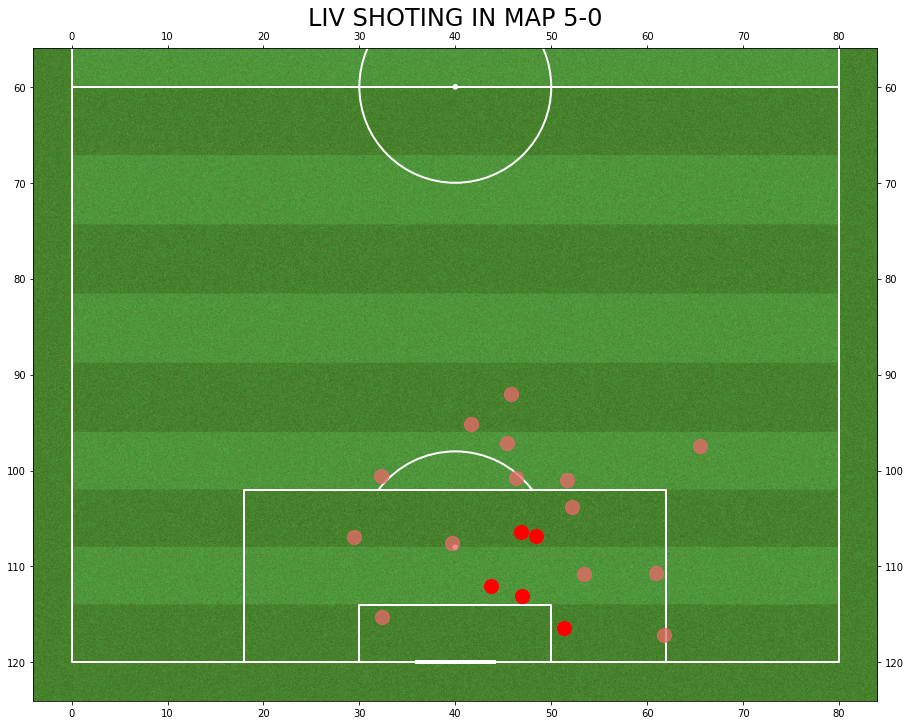

In [ ]:
#โครงร่าง
fig, ax = plt.subplots(figsize=(20,12))
fig.set_facecolor('#ffffff')
ax.patch.set_facecolor('#22312b')

#สนาม
pitch = VerticalPitch(
                pitch_color='grass',
                line_color="white",
                stripe=True,
                tick=True,
                half=True,
                constrained_layout=True, 
                tight_layout=False,
                axis=True, 
                label=True
              )  
pitch.draw(ax=ax)

plt.gca().invert_yaxis()

#ข้อมูล
#plot the points, you can use a for loop to plot the different outcomes if you want
#ต้องสลับ x กับ y เพราะ สลับแนว
plt.scatter(df_LIV['y'],df_LIV['x'], s=200,c='#ea6969',alpha=.75)
plt.scatter(df_LIV_goal['y'],df_LIV_goal['x'], s=200 ,c='Red',  marker='o')

# messi shot data from csv
# plt.scatter(messi_shot_data['x'],messi_shot_data['y'], s=150,c='blue',alpha=.7)

plt.title("LIV SHOTING IN MAP 5-0", fontsize = 24 ,c='black')

In [1]:
print('Hello')

Hello
